In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Assignment I** <br/> *Predicting mood based on smartphone data*

---

In [13]:
# load data
data = pd.read_csv('data/mood_smartphone.csv')
data.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [14]:
# get unique variables
print(data.variable.unique())

['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


In [15]:
# get unique id
print(f'Number of unique IDs: {len(data.id.unique())}')

Number of unique IDs: 27


## Data description

| Variable | Description |
|----------|-------------|
| Mood     | ...         |


(array([   3.,   13.,   17.,   92.,  258., 1009., 2588., 1429.,  215.,
          17.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

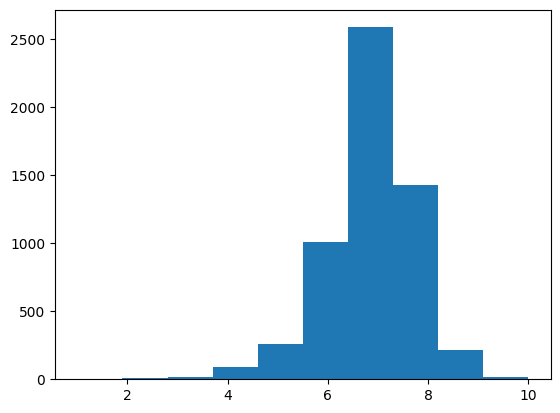

In [16]:
# get mood
mood = data[data.variable == 'mood']

plt.hist(mood.value, bins=10)